In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [35]:
def get_eucledian_distance(x,y):
    dist = 0
    for i in range(len(x)):
        dist = dist + (x[i]-y[i])**2
    return np.sqrt(dist)

def assign_cluster(inp_list,cluster_centroids):
    points_cluster_ids = []
    for point in inp_list:
        min_dist = np.inf
        point_clust_id = None
        for clust_id in cluster_centroids.keys():
            dist_to_clust_center = get_eucledian_distance(point,cluster_centroids[clust_id])
#             print clust_id,point,cluster_centroids[clust_id],dist_to_clust_center
            if dist_to_clust_center<min_dist:
                min_dist = dist_to_clust_center
                point_clust_id = clust_id
#         print point_clust_id
        points_cluster_ids.append(point_clust_id)
    return points_cluster_ids

def update_cluster_centroids(inp_list,points_cluster_ids,cluster_centroids):
    cluster_stats = {}
    for key in cluster_centroids:
        cluster_stats[key] = np.zeros(len(inp_list[0])*2).tolist() #a_sum,a_count,b_sum,b_count
    for ind in range(len(inp_list)):
        point = inp_list[ind]
        point_clust_id = points_cluster_ids[ind]
        for col in range(len(point)):
            cluster_stats[point_clust_id][col*2] = cluster_stats[point_clust_id][col*2]+ point[col]
            cluster_stats[point_clust_id][col*2 + 1] = cluster_stats[point_clust_id][col*2 + 1]+ 1
    for key in cluster_centroids:
        if cluster_stats[key][1]>0:
            cluster_centroids[key] = [cluster_stats[key][i*2]/max(1,cluster_stats[key][i*2+1]) for i in range(len(inp_list[0]))]
    return cluster_centroids

def initialize_centroids(inp_list,k):
    cluster_centroids = {}
    for i in range(k):
        #cluster_centroids[i] = [0,0]
        cluster_centroids[i] = random.choice(inp_list)
    return cluster_centroids

def fn_to_show_clusters(inp_list,points_cluster_ids,cluster_centroids):
    df = pd.DataFrame(inp_list,columns=['x','y'])
    df['cluster_id'] = points_cluster_ids
    df['cluster_id'] = df['cluster_id'].apply(lambda x:'Group '+str(x))
    sns.scatterplot(x=df['x'],y=df['y'],hue=df['cluster_id'].astype(str))
    plt.legend(loc='lower right')
    for cl_label in cluster_centroids:
        plt.scatter(cluster_centroids[cl_label][0],cluster_centroids[cl_label][1], marker='s', s=20,c='k')
    plt.show()
    
def k_means_clustering(inp_list,k,n_iter=100,show_clusters=True,show_steps=True):
    # creating centroids object
    cluster_centroids = initialize_centroids(inp_list,k)
    # assigning random cluster ids as first step
    cluster_ids = cluster_centroids.keys()
    points_cluster_ids = []
    for ind in range(len(inp_list)):
        points_cluster_ids.append(random.choice(cluster_ids))
    print ("initial points")
    if show_steps:
            fn_to_show_clusters(inp_list,points_cluster_ids,cluster_centroids)
    for i in range(n_iter):
        if show_steps:
            print('Iteration No:{}'.format(i))
        cluster_centroids_bck = cluster_centroids.copy()
        cluster_centroids = update_cluster_centroids(inp_list,points_cluster_ids,cluster_centroids)
        points_cluster_ids = assign_cluster(inp_list,cluster_centroids)
        if show_steps:
            fn_to_show_clusters(inp_list,points_cluster_ids,cluster_centroids)
        if cluster_centroids_bck == cluster_centroids:
            break
    if cluster_centroids_bck != cluster_centroids:
        print "havent converged"
    if show_clusters:
        fn_to_show_clusters(inp_list,points_cluster_ids,cluster_centroids)
    return points_cluster_ids,cluster_centroids

input list has 6 clusters 
No of clusters: 3
initial points


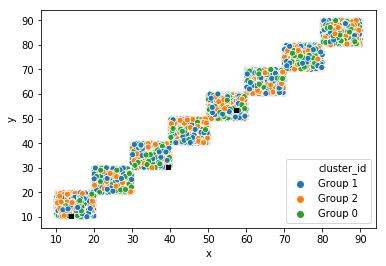

Iteration No:0


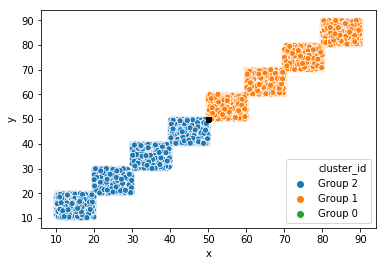

Iteration No:1


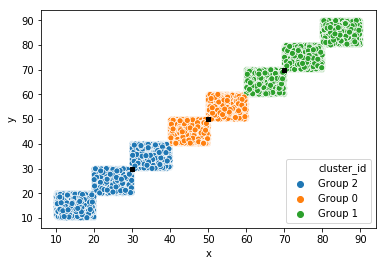

Iteration No:2


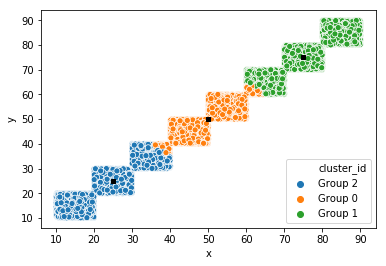

Iteration No:3


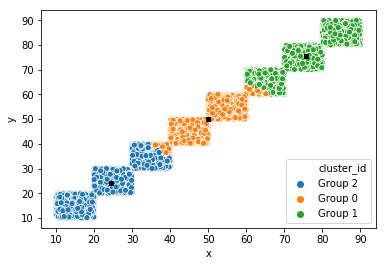

Iteration No:4


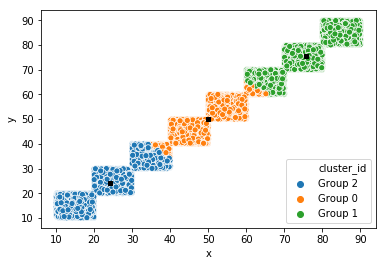

Iteration No:5


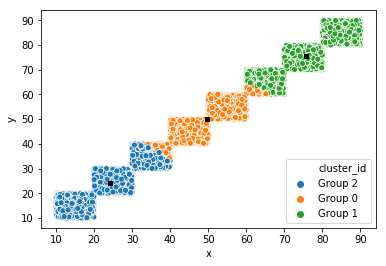

Iteration No:6


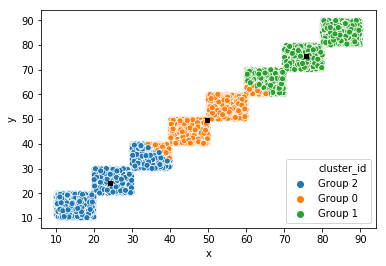

Iteration No:7


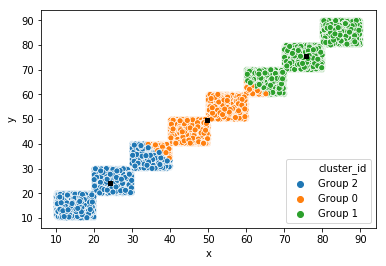

Iteration No:8


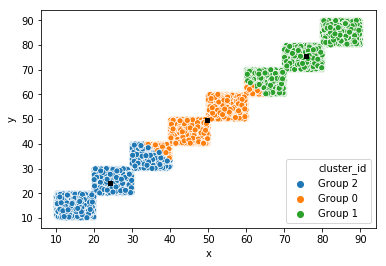

Iteration No:9


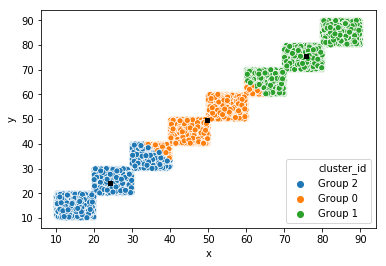

Iteration No:10


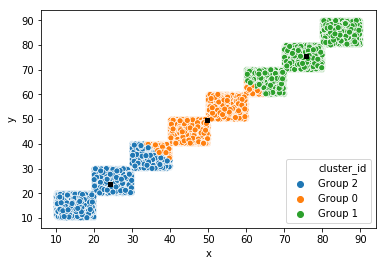

Iteration No:11


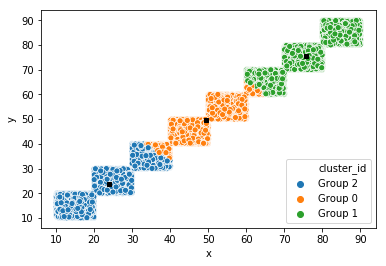

Iteration No:12


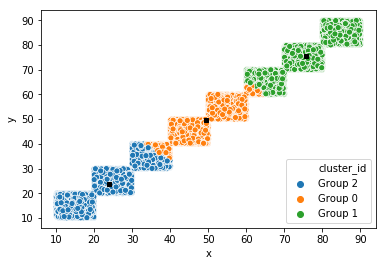

Iteration No:13


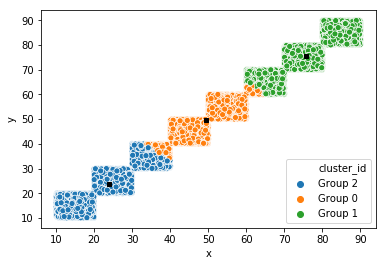

Iteration No:14


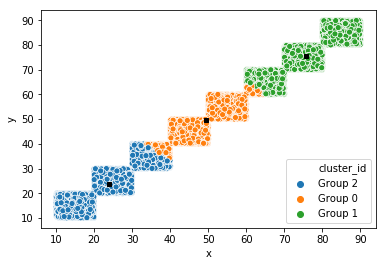

Iteration No:15


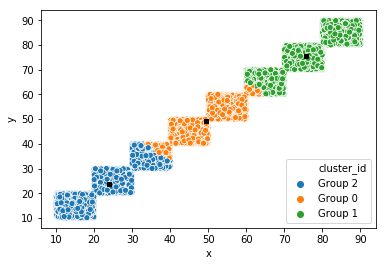

Iteration No:16


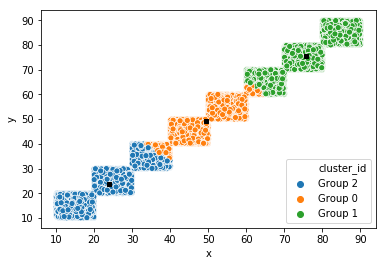

Iteration No:17


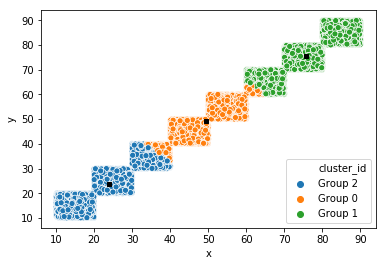

Iteration No:18


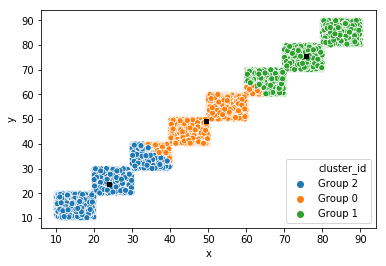

Iteration No:19


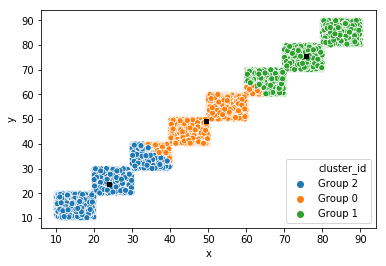

Iteration No:20


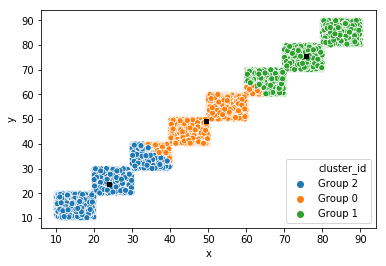

Iteration No:21


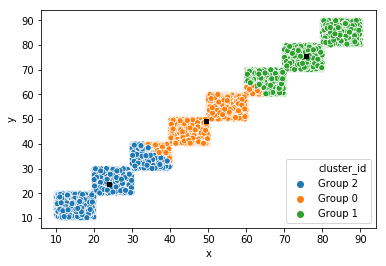

Iteration No:22


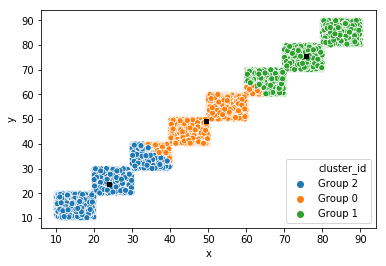

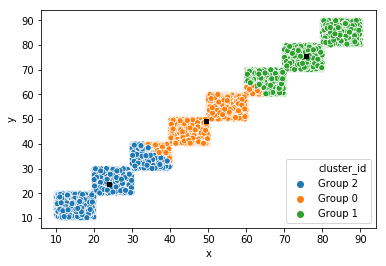

{0: [49.29786233276959, 49.32213664377838], 1: [75.64964918770309, 75.56503108201723], 2: [23.90802972843913, 23.751279121517197]}


In [37]:
import random
# from k_means import k_means_clustering
inp_list = []
for i in range(2000):
    inp_list.append((10+random.random()*10,10+random.random()*10))
    inp_list.append((20+random.random()*10,20+random.random()*10))
    inp_list.append((30+random.random()*10,30+random.random()*10))
    inp_list.append((40+random.random()*10,40+random.random()*10))
    inp_list.append((50+random.random()*10,50+random.random()*10))
    inp_list.append((60+random.random()*10,60+random.random()*10))
    inp_list.append((70+random.random()*10,70+random.random()*10))
    inp_list.append((80+random.random()*10,80+random.random()*10))

print 'input list has 6 clusters '
# for i in range(2,10):
for i in [3]:
    print 'No of clusters: {}'.format(i)
    points_cluster_ids,cluster_centroids = k_means_clustering(inp_list,k=i,show_steps=True,n_iter=1000)
    print cluster_centroids

In [57]:
inp_list = np.random.rand(20000,3).tolist()

print 'input list has 6 clusters '
# for i in range(2,10):
for i in [5]:
    print 'No of clusters: {}'.format(i)
    points_cluster_ids,cluster_centroids = k_means_clustering(inp_list,k=i,n_iter=1000,show_clusters=False,show_steps=False)
    print cluster_centroids

input list has 6 clusters 
No of clusters: 5
initial points
{0: [0.48349126714623447, 0.23258989265431104, 0.23272171841316586], 1: [0.7720000360511157, 0.4725091584718529, 0.7612662384616714], 2: [0.74081719426066, 0.7246015095452958, 0.25979479331711636], 3: [0.2525995682017558, 0.2824639090852486, 0.7436846380376736], 4: [0.24756666778222028, 0.7762665165092548, 0.5086730170237374]}


In [58]:
df = pd.DataFrame(inp_list)
df['cluster_id'] = points_cluster_ids
df['cluster_id'] = df['cluster_id'].apply(lambda x:'Group '+str(x))
df.head()

,0,1,2,cluster_id
0,0.919707,0.810987,0.902153,Group 1
1,0.853499,0.693952,0.335568,Group 2
2,0.873521,0.648551,0.050335,Group 2
3,0.908168,0.357323,0.056069,Group 2
4,0.915538,0.716759,0.093413,Group 2


In [59]:
%matplotlib inline

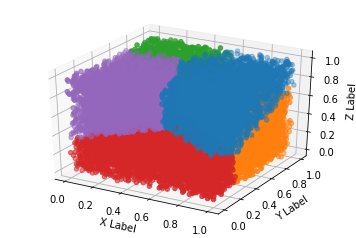

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for group in list(df.cluster_id.unique()):
    ax.scatter(df[df.cluster_id==group][0], df[df.cluster_id==group][1], df[df.cluster_id==group][2], marker='o',)

for cl_label in cluster_centroids:
    ax.scatter(cluster_centroids[cl_label][0],cluster_centroids[cl_label][1],cluster_centroids[cl_label][1], marker='s', s=20,c='k')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [62]:
%%time
inp_list = np.random.rand(20000,10).tolist()

print 'input list has 6 clusters '
# for i in range(2,10):
for i in [5]:
    print 'No of clusters: {}'.format(i)
    points_cluster_ids,cluster_centroids = k_means_clustering(inp_list,k=i,n_iter=1000,show_clusters=False,show_steps=False)
    print cluster_centroids

input list has 6 clusters 
No of clusters: 5
initial points
{0: [0.4788762290184552, 0.30661496893040435, 0.40344046836545616, 0.49497276901012255, 0.2592426041069134, 0.7206635967177458, 0.4696942569781887, 0.5289136754816656, 0.5169373668044722, 0.5314292411908478], 1: [0.5537334379615448, 0.7345016328744306, 0.7250021336086524, 0.5191919548372679, 0.5534124831191547, 0.703156921441876, 0.5233178927454386, 0.46114733802121827, 0.4579561467773262, 0.4867696397087897], 2: [0.5372230466195324, 0.2637260455693283, 0.7195681514070054, 0.45031010381313613, 0.6092810399633672, 0.31952425595396594, 0.5209075206343325, 0.4649030745536609, 0.4941252937011434, 0.49985661757269373], 3: [0.48134027263150475, 0.5106889666452336, 0.21841133789449285, 0.5151688922959134, 0.7636493420266091, 0.5100135062378378, 0.5051967110175755, 0.49830969778967, 0.5145064377487361, 0.47932159708550787], 4: [0.4594692122767246, 0.6998886675835003, 0.45234790725203944, 0.5063393380555081, 0.28798440595378877, 0.2499